In [1]:
# kakao 형태소 분석기 

!git clone https://github.com/kakao/khaiii.git

Cloning into 'khaiii'...
remote: Enumerating objects: 877, done.
remote: Total 877 (delta 0), reused 0 (delta 0), pack-reused 877
Receiving objects: 100% (877/877), 30.21 MiB | 32.91 MiB/s, done.
Resolving deltas: 100% (358/358), done.


In [0]:
import os

In [3]:
os.chdir('/content/khaiii')
os.mkdir('/content/khaiii/build')
os.chdir('/content/khaiii/build')
!cmake ..

-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test fma_compiles
-- Performing Test fma_compiles - Success
-- Performing Test fma_runs
-- Performing Test fma_runs - Success
-- [khaiii] fused multiply add option enab

In [4]:
!make all

Scanning dependencies of target obj_khaiii
[  3%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Config.cpp.o
[  7%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Embed.cpp.o
[ 11%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/ErrPatch.cpp.o
[ 15%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/KhaiiiImpl.cpp.o
[ 19%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Morph.cpp.o
[ 23%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Preanal.cpp.o
[ 26%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Resource.cpp.o
[ 30%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Restore.cpp.o
[ 34%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Sentence.cpp.o
[ 38%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Tagger.cpp.o
[ 42%] Building CXX object CMakeFiles/obj_khaiii.dir/src/main/cpp/khaiii/Trie.cpp.o
[ 4

In [5]:
!make resource

Scanning dependencies of target resource
INFO:root:config: {
    "cutoff": 1,
    "embed_dim": 35,
    "hidden_dim": 320,
    "model_id": "munjong.cut1.win4.sdo0.1.emb35.lr0.001.lrd0.9.bs500",
    "rsc_src": "../rsc/src",
    "window": 4
}
INFO:root:vocab.in: 5621 entries, 0 cutoff
INFO:root:vocab.out: 500 entries, 0 cutoff
INFO:root:restore.dic: 4303 entries
INFO:root:preanal.manual
INFO:root:preanal.auto
INFO:root:trie saved: /content/khaiii/build/share/khaiii/preanal.tri
INFO:root:total nodes: 120812
INFO:root:expected size: 1932992
INFO:root:value saved: /content/khaiii/build/share/khaiii/preanal.val
INFO:root:total entries: 83373
INFO:root:expected size: 593730
INFO:root:restore.key: 17212
INFO:root:restore.val: 68848
INFO:root:restore.one: 503
INFO:root:base.errpatch.auto
INFO:root:base.errpatch.manual
INFO:root:trie saved: /content/khaiii/build/share/khaiii/errpatch.tri
INFO:root:total nodes: 2067
INFO:root:expected size: 33072
INFO:root:length saved: /content/khaiii/build/share

In [6]:
!make package_python

Scanning dependencies of target package_python
Run CPack packaging tool for source...
CPack: Create package using ZIP
CPack: Install projects
CPack: - Install directory: /content/khaiii
CPack: Create package
CPack: - package: /content/khaiii/build/khaiii-0.4.zip generated.
Built target package_python


In [7]:
os.listdir()

['package_python',
 '_3rdParty',
 'CTestTestfile.cmake',
 'CMakeFiles',
 'lib',
 'CMakeCache.txt',
 'bin',
 'CPackSourceConfig.cmake',
 'cmake_install.cmake',
 'share',
 'CPackConfig.cmake',
 'Makefile',
 'test',
 '_CPack_Packages']

In [8]:
os.chdir('package_python')
!pip install  . 

Processing /content/khaiii/build/package_python
  Created wheel for khaiii: filename=khaiii-0.4-cp36-none-any.whl size=22891042 sha256=546e0d2e00cf3c00b7693bb18ad66d685e8cb5d001ceaa7383296dbdc4f27722
  Stored in directory: /tmp/pip-ephem-wheel-cache-g6ur8i93/wheels/b0/03/83/fb129110ddf28d31298b0731cd182d7d0f094935ae9bf8d4bc
Successfully built khaiii


### Requires to restart

In [0]:
import khaiii

In [0]:
api = khaiii.KhaiiiApi()

In [3]:
# binding checker
for word in api.analyze('안녕, 세상아.'):
    print(word)

안녕,	안녕/IC + ,/SP
세상아.	세상/NNG + 아/JKV + ./SF


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re
from keras.preprocessing import text, sequence 
from keras import models, layers
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0.Projects/Korean Language Models/petition.csv', encoding='utf-8')

In [7]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
df = df.loc[:, ['category' ,'title', 'content']]

In [9]:
df.head()

,category,title,content
0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
df = df.drop_duplicates()

In [11]:
df.shape

(384337, 3)

In [12]:
df.head()

,category,title,content
0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
5,보건복지,보건복지부 부령 제339호중 “특수의료장비 운영에 관한 규칙” 중 불합리한 행정제...,청원인 왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[['title', 'content']], df['category'], train_size=50000, stratify=df['category'], random_state=1228)

(50000, 2)
(50000,)


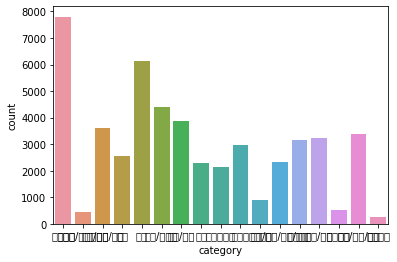

In [14]:
print(x_train.shape)
print(y_train.shape)
sns.countplot(y_train)

In [15]:
x_train.reset_index(drop=True, inplace=True)
x_train.head()

,title,content
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세..."
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [16]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

0         정치개혁
1         정치개혁
2    저출산/고령화대책
3     교통/건축/국토
4           행정
Name: category, dtype: object

In [0]:
df = pd.concat([x_train, y_train], axis=1)

In [18]:
df.head()

,title,content,category
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정


In [19]:
pd.get_dummies(df['category']).head()

,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
le = LabelEncoder()

df['category_le'] = le.fit_transform(df['category'])

In [21]:
le.classes_

array(['경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물',
       '보건복지', '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리',
       '저출산/고령화대책', '정치개혁', '행정'], dtype=object)

In [0]:
# 행정, 정치개혁, 경제민주화, 외교/통일/국방

# 교통/건축/국토, 안전/환경

# 보건복지, 저출산/고령화대책, 육아/교육

# 기타

# 성장동력, 미래, 농산어촌, 일자리

# 문화/예술/체육/언론, 반려동물, 인권,성평등

In [0]:
# multi_label = np.empty(shape = (df.shape[0], 5))

# multi_label

In [0]:
# test_df = df.iloc[:5, :]

In [0]:
# test_df.head()

In [26]:
multi_label_df = pd.get_dummies(df['category'])

print(multi_label_df.shape)
multi_label_df.head()

(50000, 17)


,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
multi_label_df.values

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [28]:
multi_label_df.values.shape

(50000, 17)

In [29]:
multi_label_df.iloc[0, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             0
Name: 0, dtype: uint8

In [0]:
if np.argmax(multi_label_df.iloc[0, :]) in ['교통/건축/국토', '안전/환경']:
  multi_label_df.loc[0, ['교통/건축/국토', '안전/환경']] = 1

In [31]:
multi_label_df.iloc[0, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             0
Name: 0, dtype: uint8

## Create Multi label 

In [0]:
if np.argmax(multi_label_df.loc[0, '경제민주화': '행정']) in ['교통/건축/국토', '안전/환경']:
    multi_label_df.loc[i, ['교통/건축/국토', '안전/환경']] = 1

In [33]:
np.argmax(multi_label_df.loc[0, '경제민주화': '행정'])

'정치개혁'

In [34]:
np.argmax(multi_label_df.loc[0, '경제민주화': '행정']) in ['교통/건축/국토', '안전/환경']

False

In [35]:
np.argmax(multi_label_df.iloc[0, :])

'정치개혁'

In [0]:
if np.argmax(multi_label_df.iloc[0, :]) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
  multi_label_df.iloc[0, [16, 15, 0, 12]] = 1

In [37]:
multi_label_df.iloc[0, :]

경제민주화          1
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           0
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         1
일자리            0
저출산/고령화대책      0
정치개혁           1
행정             1
Name: 0, dtype: int64

In [38]:
multi_label_df.columns

Index(['경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물', '보건복지',
       '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리', '저출산/고령화대책',
       '정치개혁', '행정'],
      dtype='object')

In [39]:
multi_label_df.shape

(50000, 17)

In [0]:
# '경제민주화', '교통/건축/국토', '기타', '농산어촌', '문화/예술/체육/언론', '미래', '반려동물',
# '보건복지', '성장동력', '안전/환경', '외교/통일/국방', '육아/교육', '인권/성평등', '일자리',
# '저출산/고령화대책', '정치개혁', '행정'

# -------------------------------------------------------------------------------------------- #

# 행정, 정치개혁, 경제민주화, 외교/통일/국방
# 교통/건축/국토, 안전/환경
# 보건복지, 저출산/고령화대책, 육아/교육
# 기타
# 성장동력, 미래, 농산어촌, 일자리
# 문화/예술/체육/언론, 반려동물, 인권/성평등


# multi_label_df = pd.get_dummies(df['category'])

# for i in range(multi_label_df.shape[0]):
#   if np.argmax(multi_label_df.iloc[i, :]) in ['교통/건축/국토', '안전/환경']:
#     multi_label_df.iloc[i, [1, 9]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
#     multi_label_df.iloc[i, [16, 15, 0, 12]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['보건복지', '저출산/고령화대책', '육아/교육']:
#     multi_label_df.iloc[i, [7, 14, 11]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['성장동력', '미래', '농산어촌', '일자리']:
#     multi_label_df.iloc[i, [8, 5, 3, 13]] = 1 
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['문화/예술/체육/언론', '반려동물', '인권/성평등']:
#     multi_label_df.iloc[i, [4, 6, 12]] = 1
#   elif np.argmax(multi_label_df.iloc[i, :]) in ['기타']:
#     multi_label_df.iloc[i, 2] = 1  
    
    
  



In [0]:
def multi_label(x):
  if np.argmax(x) in ['교통/건축/국토', '안전/환경']:
    x[['교통/건축/국토', '안전/환경']] = 1
    return x
  
  elif np.argmax(x) in ['행정', '정치개혁', '경제민주화', '외교/통일/국방']:
    x[['행정', '정치개혁', '경제민주화', '외교/통일/국방']] = 1
    return x
  
  elif np.argmax(x) in ['보건복지', '저출산/고령화대책', '육아/교육']:
    x[['보건복지', '저출산/고령화대책', '육아/교육']] = 1
    return x
  
  elif np.argmax(x) in ['성장동력', '미래', '농산어촌', '일자리']:
    x[['성장동력', '미래', '농산어촌', '일자리']] = 1
    return x
  elif np.argmax(x) in ['문화/예술/체육/언론', '반려동물', '인권/성평등']:
    x[['문화/예술/체육/언론', '반려동물', '인권/성평등']] = 1
    return x
  elif np.argmax(x) in ['기타']:
    x['기타'] = 1 
    return x

In [41]:
multi_label_df.iloc[-22, :]

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           1
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          0
인권/성평등         0
일자리            0
저출산/고령화대책      0
정치개혁           0
행정             0
Name: 49978, dtype: int64

In [42]:
multi_label(multi_label_df.iloc[-22, :])

경제민주화          0
교통/건축/국토       0
기타             0
농산어촌           0
문화/예술/체육/언론    0
미래             0
반려동물           0
보건복지           1
성장동력           0
안전/환경          0
외교/통일/국방       0
육아/교육          1
인권/성평등         0
일자리            0
저출산/고령화대책      1
정치개혁           0
행정             0
Name: 49978, dtype: int64

In [0]:
multi_label_df = pd.get_dummies(df['category'])

In [0]:
for i in range(multi_label_df.shape[0]):
  multi_label_df.iloc[i, :] = multi_label(multi_label_df.iloc[i, :])

In [45]:
multi_label_df

,경제민주화,교통/건축/국토,기타,농산어촌,문화/예술/체육/언론,미래,반려동물,보건복지,성장동력,안전/환경,외교/통일/국방,육아/교육,인권/성평등,일자리,저출산/고령화대책,정치개혁,행정
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
49996,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
49997,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
49998,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [46]:
multi_label_df.shape

(50000, 17)

In [47]:
multi_label_df.values

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [48]:
multi_label_df.shape

(50000, 17)

# **convert to text to character lavel, khaii morph**

In [49]:
df.head()

,title,content,category,category_le
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁,15
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁,15
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책,14
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토,1
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정,16


In [0]:
df['full_txt'] = df['title'] + ' ' + df['content']

In [51]:
df.head()

,title,content,category,category_le,full_txt
0,제발 국회의원도 무노동무입긍 해주세요,아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요\n그 법을 만든 국회의...,정치개혁,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도...
1,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다.,조합만들게한 옛날 법들 전부 없애고 다시 법을\n개정해서 시행해라.제대로된 법을 만...,정치개혁,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2,저출산대책을 이렇게 변경합시다.,언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴 겁니까? 또 언제까지 취업타령...,저출산/고령화대책,14,저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3,“1가구 1주택자”는 모두 죄인입니까?,"서울에서 직장 다니다가, 2001년 직장을 먼 지방으로 옮기게 되어 서울 집을 전세...",교통/건축/국토,1,"“1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ..."
4,가상화폐 거래소 폐쇄 절대 불가,거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,행정,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [0]:
df = df.loc[:, ['category_le', 'full_txt']]

In [53]:
print(df.shape)
df.head()

(50000, 2)


,category_le,full_txt
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도...
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2,14,저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3,1,"“1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


## Brief text preprocess, remove punct, \n

In [54]:
df['full_txt']

0        제발  국회의원도 무노동무입긍 해주세요 아니  왜 일반 국민들말  무노동무입급금이도...
1        지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다. 조합만들...
2        저출산대책을 이렇게 변경합시다. 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다...
3        “1가구 1주택자”는 모두 죄인입니까? 서울에서 직장 다니다가, 2001년 직장을 ...
4            가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다
                               ...                        
49995    공무원 시험 필수과목을 영어와 미국사로 바꿔주세요! 국어보다 영어를 더 중시하는 나...
49996        소년법폐지 소년법폐지해주세요\n아이키우는 엄마로써 너무 무섭고 가슴이 아픕니다..
49997    중증의료센터 국가적 지원확대요청 열악한 중증외상환자의 치료를 국가적 차원에서 지원하...
49998    전문가와 현장의 목소리를 반영해주세요. 제도를 제정할 때, 전문가 및 현재 그 분야...
49999    그냥 자유게시판 만들만 안될까요? 국민들 분노 털어놓는 곳이 굳이 청원하는 곳은 아...
Name: full_txt, Length: 50000, dtype: object

In [55]:
pattern_char = re.compile('[^가-힣a-zA-Z0-9]+')
pattern_space = re.compile('\s\s+')
pattern_n = re.compile('\\\\n')
pattern_n_2 = re.compile('\n+')
pattern_t = re.compile('\t+')
def text_preprocess(x):
  x = str(x).lower()
  x = re.sub(pattern_n, ' ', x)
  x = re.sub(pattern_space, ' ', x)
  x = re.sub(pattern_char, ' ', x)
  x = re.sub(pattern_n_2, ' ', x)
  x = re.sub(pattern_t, ' ', x)
  return x

print(df['full_txt'][0])
print(text_preprocess(df['full_txt'][0]))

제발  국회의원도 무노동무입긍 해주세요 아니  왜 일반 국민들말  무노동무입급금이도는지  모르겠네요\n그 법을 만든 국회의원들을 알 한번 안하고도 억대 월급을 받는다는
제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 모르겠네요 그 법을 만든 국회의원들을 알 한번 안하고도 억대 월급을 받는다는


In [0]:
df['full_txt'] = df['full_txt'].apply(text_preprocess)

In [57]:
df['full_txt'].head()

0    제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...
1    지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...
2    저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...
3     1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...
4        가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다
Name: full_txt, dtype: object

# **1) char level**

In [0]:
df.head()

,category_le,full_txt
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [0]:
# 초성 리스트. 00 ~ 18
CHOSUNG_LIST = ['ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']
# 중성 리스트. 00 ~ 20
JUNGSUNG_LIST = ['ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ']
# 종성 리스트. 00 ~ 27 + 1(1개 없음)
JONGSUNG_LIST = ['*', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ']

ALPHABET_LIST = ['A', 'B', 'C', 'D', 'E','F','G','H','I','J','K','L','N','M','O','P','Q','R','S','T','U','V','W','X','Y','Z']

NUMBER_LIST = ['0','1','2','3','4','5','6','7','8','9']

def korean_to_be_split(korean_word):
    r_lst = []
    for w in list(korean_word.strip()):
        ## 영어인 경우 구분해서 작성함. 
        if '가'<=w<='힣':
            ## 588개 마다 초성이 바뀜. 
            ch1 = (ord(w) - ord('가'))//588
            ## 중성은 총 28가지 종류
            ch2 = ((ord(w) - ord('가')) - (588*ch1)) // 28
            ch3 = (ord(w) - ord('가')) - (588*ch1) - 28*ch2
            r_lst.append(CHOSUNG_LIST[ch1])
            r_lst.append(JUNGSUNG_LIST[ch2])
            r_lst.append(JONGSUNG_LIST[ch3])
        else:
            r_lst.append(w)
    return r_lst
 

In [0]:
df['char'] = df['full_txt'].apply(korean_to_be_split)

In [0]:
df.head()

,category_le,full_txt,char
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...,"[ㅈ, ㅔ, *, ㅂ, ㅏ, ㄹ, , ㄱ, ㅜ, ㄱ, ㅎ, ㅚ, *, ㅇ, ㅢ, ..."
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...,"[ㅈ, ㅣ, *, ㅋ, ㅣ, *, ㄹ, ㅕ, *, ㄴ, ㅡ, ㄴ, , ㅂ, ㅓ, ..."
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...,"[ㅈ, ㅓ, *, ㅊ, ㅜ, ㄹ, ㅅ, ㅏ, ㄴ, ㄷ, ㅐ, *, ㅊ, ㅐ, ㄱ, ..."
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...,"[1, ㄱ, ㅏ, *, ㄱ, ㅜ, *, , 1, ㅈ, ㅜ, *, ㅌ, ㅐ, ㄱ, ..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,"[ㄱ, ㅏ, *, ㅅ, ㅏ, ㅇ, ㅎ, ㅘ, *, ㅍ, ㅖ, *, , ㄱ, ㅓ, ..."


In [0]:
from keras.preprocessing import text, sequence

Using TensorFlow backend.


In [0]:
text_full_list = df['char'].to_list() + [CHOSUNG_LIST, JUNGSUNG_LIST, JONGSUNG_LIST, ALPHABET_LIST, NUMBER_LIST]

In [0]:
token = text.Tokenizer(filters='', char_level=True, split=',')

token.fit_on_texts(text_full_list)

In [0]:
text_cov = token.texts_to_sequences(df['char'])

In [0]:
np.max(np.array([len(i) for i in text_cov]))

168751

In [0]:
np.mean(np.array([len(i) for i in text_cov]))

1275.49666

In [0]:
text_pad = sequence.pad_sequences(text_cov, maxlen=5000, padding='post', dtype=np.uint8)

text_pad

array([[14, 21,  1, ...,  0,  0,  0],
       [14,  7,  1, ...,  0,  0,  0],
       [14, 11,  1, ...,  0,  0,  0],
       ...,
       [14, 18,  3, ...,  0,  0,  0],
       [14, 11,  4, ...,  0,  0,  0],
       [ 6,  9,  1, ...,  0,  0,  0]], dtype=uint8)

In [0]:
target = multi_label_df.values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(text_pad, target, test_size=0.2, stratify=target, random_state=42)

In [0]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(40000, 5000)
(40000, 17)
(10000, 5000)
(10000, 17)


In [0]:
from keras import models, layers
from keras import metrics


In [0]:
max_len = len(token.index_word)

In [0]:
input_tensor = layers.Input(shape=(5000,))
emb = layers.Embedding(max_len+1, 300)(input_tensor)
x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(emb)
x = layers.Conv1D(256, 12, activation='relu')(x)
x_1 = layers.GlobalAvgPool1D()(x)
x_2 = layers.GlobalMaxPool1D()(x)
x_c = layers.Concatenate()([x_1, x_2])
x = layers.Dense(256, activation='relu')(x_c)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(17, activation='sigmoid')(x)

model = models.Model(input_tensor, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 1071s 27ms/step - loss: 0.4453 - acc: 0.8237 - val_loss: 0.4248 - val_acc: 0.8340
Epoch 2/50
40000/40000 [==============================] - 1064s 27ms/step - loss: 0.3997 - acc: 0.8388 - val_loss: 0.3689 - val_acc: 0.8503
Epoch 3/50
40000/40000 [==============================] - 1060s 27ms/step - loss: 0.3468 - acc: 0.8573 - val_loss: 0.3395 - val_acc: 0.8610
Epoch 4/50
40000/40000 [==============================] - 1058s 26ms/step - loss: 0.3210 - acc: 0.8676 - val_loss: 0.3263 - val_acc: 0.8672
Epoch 5/50
40000/40000 [==============================] - 1059s 26ms/step - loss: 0.3038 - acc: 0.8752 - val_loss: 0.3282 - val_acc: 0.8660
Epoch 6/50
40000/40000 [==============================] - 1058s 26ms/step - loss: 0.2896 - acc: 0.8817 - val_loss: 0.3300 - val_acc: 0.8666
Epoch 7/50
40000/40000 [==============================] - 1058s 26ms/step - loss: 0.2747 - acc: 0.8882 - val_l

KeyboardInterrupt: ignored

In [0]:
from sklearn.metrics import f1_score, auc, roc_auc_score

In [0]:
x_test

array([[ 3, 36,  1, ...,  0,  0,  0],
       [44,  3, 30, ...,  0,  0,  0],
       [ 6,  7,  8, ...,  0,  0,  0],
       ...,
       [32,  5,  3, ...,  0,  0,  0],
       [73, 73, 73, ...,  0,  0,  0],
       [10, 18,  1, ...,  0,  0,  0]], dtype=uint8)

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_pred

array([[3.3655763e-02, 2.3443997e-03, 1.4000076e-01, ..., 4.8194140e-02,
        2.8411627e-02, 2.9550701e-02],
       [1.1753142e-03, 9.4288588e-04, 3.1528264e-02, ..., 1.8675253e-01,
        1.2027323e-03, 1.2431145e-03],
       [3.8053393e-03, 4.9402118e-01, 1.5917608e-01, ..., 1.0953665e-02,
        3.2805204e-03, 3.7114918e-03],
       ...,
       [9.9258721e-03, 9.6808636e-01, 1.7098010e-02, ..., 6.1455369e-04,
        8.5554719e-03, 7.6040328e-03],
       [7.8021634e-01, 6.0870945e-03, 1.8445083e-01, ..., 1.6821057e-02,
        7.4915183e-01, 7.7250814e-01],
       [8.6704195e-01, 3.6231875e-03, 7.6120138e-02, ..., 5.1212311e-04,
        8.6539638e-01, 8.8019580e-01]], dtype=float32)

In [0]:
y_pred2 = model.predict(x_test)>0.5

In [0]:
y_pred2.astype('int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 1]])

In [0]:
import tensorflow as tf
import keras.backend as K

def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

In [0]:
f1_score(y_test, y_pred2.astype('int'), average='macro')

0.529204614083933

In [0]:
roc_auc_score(y_test, y_pred)

0.8344309219967745

In [0]:
roc_auc_score(y_test, y_pred, average='weighted')

0.832913071327906

In [0]:
roc_auc_score(y_test, y_pred2)

0.7056614839392675

In [0]:
roc_auc_score(y_test, y_pred2, average='weighted')

0.7149526722814399

# **2) word Level**

In [58]:
df.head()

,category_le,full_txt
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다


In [59]:
df.sample(15)

,category_le,full_txt
1043,2,불법다단계 엠페이스에대해 엠페이스라는 불법다단계가 강릉에너무 많이 퍼지고있습니다 여...
16496,16,스포츠토토 없애야 합니다 야구축구 스포츠선수 감독 그지새끼들아or 체육진흥공단 스포...
43240,2,애플 코리아 서비스 불만 고소 고발 요청 드립니다 애플 코리아 서비스 매우 불만 있...
23380,9,5미터도 안되는곳에 중개기 설치의 안전성 여부 이곳은 서울 신라호텔 뒤쪽에 위치한 ...
43960,15,이번 국회의원 선거를 이대로 하여주십시요 지금의 국회의원으로 는 한발짝도 진전이없읍...
27962,13,개성공단 재가동 절대금지 요청 드립니다 개성공단 재가동 절대 반대 입니다 현제 대한...
8542,15,이명박 출국국금지 이명박 출국국금지
28884,5,꼭 봐주세요 여러분 다들 청와대 청원 어플이 나온거 알고 계신가요 고등학생이 개발했...
8039,13,도급사의 대한 제재 필요 혹은 무분별한 도급화방지를 촉구합니다 작년 중순까지 저는 ...
32180,16,주택 전입세대열람과 상가임대차열람을 주민센터에서 할 수있게 해 주세요 말그대로 주택...


In [0]:
kh = khaiii.KhaiiiApi()

In [0]:
def morph(x):
  obs_sent_full = []
  try :
    for i in kh.analyze(x):
      for k in i.morphs:
        obs_sent_full.append(str(k))
    return obs_sent_full
  except :
    exception = x.split()
    obs_sent_full.append(exception)
    return obs_sent_full

In [0]:
df['morph'] = df['full_txt'].apply(morph)

In [63]:
df.head()

,category_le,full_txt,morph
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...,"[제발/MAG, 국회의원/NNG, 도/JX, 무/XPN, 노/NNG, 동/MAG, ..."
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...,"[지키/VV, 려는/ETM, 법/NNG, 을/JKO, 만들/VV, 지/EC, 말/V..."
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...,"[저/XPN, 출산/NNG, 대책/NNG, 을/JKO, 이렇/VA, 게/EC, 변경..."
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...,"[1/SN, 가구/NNG, 1/SN, 주택자/NNG, 늘/VV, ㄴ/ETM, 모두/..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,"[가상/NNG, 화폐/NNG, 거래소/NNG, 폐쇄/NNG, 절대/NNG, 불가/N..."


In [0]:
morph_text = df['morph'].to_list()

In [0]:
def join_txt(x):
  return ','.join([str(i) for i in x])

In [94]:
join_txt(df['morph'][0])

'제발/MAG,국회의원/NNG,도/JX,무/XPN,노/NNG,동/MAG,무입긍/NNG,하/VV,여/EC,주/VX,시/EP,어요/EC,아니/IC,왜/MAG,일반/NNG,국민/NNG,들/XSN,말/NNG,무/XPN,노동무/NNG,입급금이/NNG,도는지/EC,모르/VV,겠/EP,네요/EC,그/MM,법/NNG,을/JKO,만들/VV,ㄴ/ETM,국회의원/NNG,들/XSN,을/JKO,알/VV,ㄹ/ETM,한/NNG,번/NNB,안/MAG,하/VV,고/EC,도/JX,억/NR,대/MM,월급/NNG,을/JKO,받/VV,는다는/ETM'

In [0]:
df['morph_cat'] = df['morph'].apply(join_txt)

In [97]:
df.head()

,category_le,full_txt,morph,morph_cat
0,15,제발 국회의원도 무노동무입긍 해주세요 아니 왜 일반 국민들말 무노동무입급금이도는지 ...,"[제발/MAG, 국회의원/NNG, 도/JX, 무/XPN, 노/NNG, 동/MAG, ...","제발/MAG,국회의원/NNG,도/JX,무/XPN,노/NNG,동/MAG,무입긍/NNG..."
1,15,지키려는 법을 만들지 말고 국민이 공감할수 있는 법을 다시 개정해야합니다 조합만들게...,"[지키/VV, 려는/ETM, 법/NNG, 을/JKO, 만들/VV, 지/EC, 말/V...","지키/VV,려는/ETM,법/NNG,을/JKO,만들/VV,지/EC,말/VX,고/EC,..."
2,14,저출산대책을 이렇게 변경합시다 언제까지 늙은 여자들이 결혼해서 애 낳기 만을 기다릴...,"[저/XPN, 출산/NNG, 대책/NNG, 을/JKO, 이렇/VA, 게/EC, 변경...","저/XPN,출산/NNG,대책/NNG,을/JKO,이렇/VA,게/EC,변경/NNG,하/..."
3,1,1가구 1주택자 는 모두 죄인입니까 서울에서 직장 다니다가 2001년 직장을 먼 ...,"[1/SN, 가구/NNG, 1/SN, 주택자/NNG, 늘/VV, ㄴ/ETM, 모두/...","1/SN,가구/NNG,1/SN,주택자/NNG,늘/VV,ㄴ/ETM,모두/MAG,죄인/..."
4,16,가상화폐 거래소 폐쇄 절대 불가 거래소 폐쇄시 문재인 대통령 탄핵 운동 가겠습니다,"[가상/NNG, 화폐/NNG, 거래소/NNG, 폐쇄/NNG, 절대/NNG, 불가/N...","가상/NNG,화폐/NNG,거래소/NNG,폐쇄/NNG,절대/NNG,불가/NNG,거래소..."


In [0]:
morph_text = df['morph_cat'].to_list()

In [0]:
token = text.Tokenizer(num_words=10000, filters='', split=',', lower=False)

In [0]:
token.fit_on_texts(morph_text)

In [106]:
max_len = len(token.index_word)

max_len

193465

In [0]:
text_cov = token.texts_to_sequences(df['morph_cat'])

In [109]:
np.max(np.array([len(x) for x in text_cov]))

33864

In [0]:
text_data = sequence.pad_sequences(text_cov, maxlen = 5000, padding='post')

In [122]:
text_data

array([[ 268,  284,   18, ...,    0,    0,    0],
       [ 310,  793,  118, ...,    0,    0,    0],
       [ 780,  525,  424, ...,    0,    0,    0],
       ...,
       [2509,  619,  861, ...,    0,    0,    0],
       [1426,   75,  569, ...,    0,    0,    0],
       [ 409,  105,   49, ...,    0,    0,    0]], dtype=int32)

In [0]:
target = multi_label_df.values

In [0]:
x_train, x_test, y_train, y_test = train_test_split(text_data, target, test_size=0.2, stratify=target, random_state=42)

In [125]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(40000, 5000)
(40000, 17)
(10000, 5000)
(10000, 17)


In [0]:
from keras import models, layers
from keras import metrics

In [127]:
input_tensor = layers.Input(shape=(5000,))
emb = layers.Embedding(10000+1, 300)(input_tensor)
x = layers.Bidirectional(layers.CuDNNLSTM(128, return_sequences=True))(emb)
x = layers.Conv1D(256, 12, activation='relu')(x)
x_1 = layers.GlobalAvgPool1D()(x)
x_2 = layers.GlobalMaxPool1D()(x)
x_c = layers.Concatenate()([x_1, x_2])
x = layers.Dense(256, activation='relu')(x_c)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(17, activation='sigmoid')(x)

model = models.Model(input_tensor, x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [128]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50


40000/40000 [==============================] - 1123s 28ms/step - loss: 0.3817 - acc: 0.8453 - val_loss: 0.3177 - val_acc: 0.8710
Epoch 2/50
40000/40000 [==============================] - 1105s 28ms/step - loss: 0.2909 - acc: 0.8825 - val_loss: 0.3080 - val_acc: 0.8731
Epoch 3/50
40000/40000 [==============================] - 1102s 28ms/step - loss: 0.2562 - acc: 0.8980 - val_loss: 0.3217 - val_acc: 0.8704
Epoch 4/50
40000/40000 [==============================] - 1098s 27ms/step - loss: 0.2195 - acc: 0.9146 - val_loss: 0.3499 - val_acc: 0.8627
Epoch 5/50
40000/40000 [==============================] - 1094s 27ms/step - loss: 0.1786 - acc: 0.9323 - val_loss: 0.3914 - val_acc: 0.8588
Epoch 6/50
12416/40000 [========>.....................] - ETA: 11:42 - loss: 0.1258 - acc: 0.9535

KeyboardInterrupt: ignored

In [0]:
from sklearn.metrics import f1_score, auc, roc_auc_score

In [130]:
x_test

array([[3246,  921,   94, ...,    0,    0,    0],
       [ 148,  151, 1372, ...,    0,    0,    0],
       [2095,    7, 5439, ...,    0,    0,    0],
       ...,
       [ 308,    9, 8382, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [3969, 4355,  559, ...,    0,    0,    0]], dtype=int32)

In [0]:
y_pred = model.predict(x_test)

In [132]:
y_pred

array([[9.74652171e-01, 1.64142251e-03, 2.15961635e-02, ...,
        8.46385956e-06, 9.65091944e-01, 9.73649859e-01],
       [1.57142282e-02, 1.72239542e-03, 1.42637789e-02, ...,
        9.64487195e-01, 1.63881183e-02, 1.65057778e-02],
       [2.48318911e-03, 9.91979659e-01, 3.96233797e-03, ...,
        6.45667315e-04, 1.93199515e-03, 2.05364823e-03],
       ...,
       [1.42694712e-01, 8.37155581e-01, 6.16101325e-02, ...,
        9.87629592e-02, 1.08256549e-01, 9.53915417e-02],
       [2.93404996e-01, 1.17816150e-01, 2.46248275e-01, ...,
        1.18804276e-01, 2.88717270e-01, 2.98900098e-01],
       [9.80109692e-01, 2.21312046e-04, 1.45050883e-02, ...,
        1.25169754e-05, 9.76528466e-01, 9.69634891e-01]], dtype=float32)

In [0]:
y_pred2 = model.predict(x_test)>0.5

In [134]:
y_pred2.astype('int')

array([[1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1]])

In [135]:
f1_score(y_test, y_pred2.astype('int'), average='macro')

0.5399866040461092

In [136]:
roc_auc_score(y_test, y_pred)

0.8181111273029605

In [137]:
roc_auc_score(y_test, y_pred, average='weighted')

0.8148829983861137

In [138]:
roc_auc_score(y_test, y_pred2)

0.7190936709199004

In [139]:
roc_auc_score(y_test, y_pred2, average='weighted')

0.7216653395657087